**Airbnb** is a global leader in the sharing economy, a platform for hosts to rent out their unused homes to guests. While the platform has changed the way people travel, it has also created new challenges, one of which is fraudulent listings. Fraudulent listings on Airbnb can include inaccurate descriptions with inaccurate information and inadequate amenities, or even worse, such as listings in which the owner pays for the accommodation and doesn't provide it on time. These fraudulent behaviours not only affect guests' plans but also damage the platform's reputation. Identifying and preventing such fraudulent listings is therefore critical to company integrity and user trust.

#### 1.	 Dataset Used 

The Airbnb Dataset  contains a variety of features related to Airbnb listings, such as host response rate, number of listings by host, property type, room type, number of people it can accommodate, number of bathrooms and bedrooms, price, minimum stay days length of stay, number of reviews, review ratings, and whether the listing is fraudulent. Each row in the dataset represents an individual listing on Airbnb. There dataset has 3585 observations and 21 variables.

#### 2.	Problem Statement and Objectives

**Problem Statement:**
The problem at hand is the prevalence of fraudulent listings on Airbnb, which poses significant challenges for the platform, impacting user experiences and damaging its reputation. These fraudulent behaviors range from inaccurate descriptions to cases where accommodations are paid for but not provided on time.

**Objectives:**

- To conduct an exploratory data analysis of the Airbnb dataset, examining various features related to listings.
- To identify trends, patterns, and relationships within the data that are indicative of potential fraudulent listings.
- To understand the factors influencing the likelihood of listing fraud and assess potential risks.
- To develop predictive models that can accurately detect fraudulent listings and contribute to maintaining the integrity and trust of Airbnb's platform.

Therefore, the purpose of our analysis is to explore the dataset, understand the characteristics of Airbnb listings, identify trends, and detect anomalies. Through in-depth exploratory data analysis, our goal is to reveal patterns and relationships in the data that help us understand the factors that influence the likelihood of listing fraud, as well as potential risks. These analyses will then be used to develop predictive models that accurately identify fraudulent listings and help Airbnb maintain the trust and security of its platform.


In [81]:
# Dataset used: https://www.kaggle.com/datasets/hawkingcr/airbnb-for-boston-with-fraud-detection Airbnb for Boston with fraud detection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [82]:
df = pd.read_csv('https://raw.githubusercontent.com/offcial17/schulich_data_science/main/Datasets/air_bnb_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   float64
 10  beds                       3585 non-null   float64
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

In [83]:
df.describe(include = 'all')

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
count,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,95.64742,0.726081,58.902371,2.820363,0.859135,1.873361,0.429010,3.041283,1.220781,1.255230,...,3.909902,1570.437378,17392.580195,3.171269,19.044630,93.749791,0.165690,1.210042,1.766165,0.213947
std,11.78841,0.446030,171.119663,4.071361,0.347930,3.327397,0.538211,1.778929,0.500698,0.752129,...,0.511011,873.197307,14833.132129,8.874133,35.571658,9.039049,0.371854,0.877998,1.924877,0.410147
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1000.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.010000,0.000000
25%,98.00000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.000000,844.000000,8500.000000,1.000000,1.000000,91.000000,0.000000,0.000000,0.640000,0.000000
50%,100.00000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.000000,1604.000000,15000.000000,2.000000,5.000000,97.000000,0.000000,1.000000,1.000000,0.000000
75%,100.00000,1.000000,7.000000,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,...,4.000000,2280.000000,22000.000000,3.000000,21.000000,100.000000,0.000000,2.000000,2.130000,0.000000
max,100.00000,1.000000,749.000000,37.000000,1.000000,12.000000,2.000000,16.000000,6.000000,5.000000,...,4.000000,3091.000000,400000.000000,300.000000,404.000000,100.000000,1.000000,3.000000,19.150000,1.000000


## EDA, Data Cleaning and Feature Engineering

In [84]:
missing_values = df.isnull().sum()
duplicated  = df.duplicated().sum()
datatypes  = df.dtypes
unqiue = df.nunique()

columns  = pd.DataFrame({
    "missing_values":missing_values,
    "duplicated":duplicated,
    "datatypes":datatypes,
    "unqiue":unqiue,
})

columns

,missing_values,duplicated,datatypes,unqiue
host_response_rate,0,36,int64,52
host_identity_verified,0,36,int64,2
host_total_listings_count,0,36,int64,35
city,0,36,int64,38
is_location_exact,0,36,int64,2
property_type,0,36,int64,13
room_type,0,36,int64,3
accommodates,0,36,int64,14
bathrooms,0,36,float64,12
bedrooms,0,36,float64,6


The dataset is checked for missing values initially in the analysis. We found no missing or null values in the dataset, however, we found 36 rows of duplicate data. These rows were dropped which reduced the total rows from 3585 to 3549.

In [85]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3549 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3549 non-null   int64  
 1   host_identity_verified     3549 non-null   int64  
 2   host_total_listings_count  3549 non-null   int64  
 3   city                       3549 non-null   int64  
 4   is_location_exact          3549 non-null   int64  
 5   property_type              3549 non-null   int64  
 6   room_type                  3549 non-null   int64  
 7   accommodates               3549 non-null   int64  
 8   bathrooms                  3549 non-null   float64
 9   bedrooms                   3549 non-null   float64
 10  beds                       3549 non-null   float64
 11  bed_type                   3549 non-null   int64  
 12  amenities                  3549 non-null   int64  
 13  price                      3549 non-null   int64  
 1

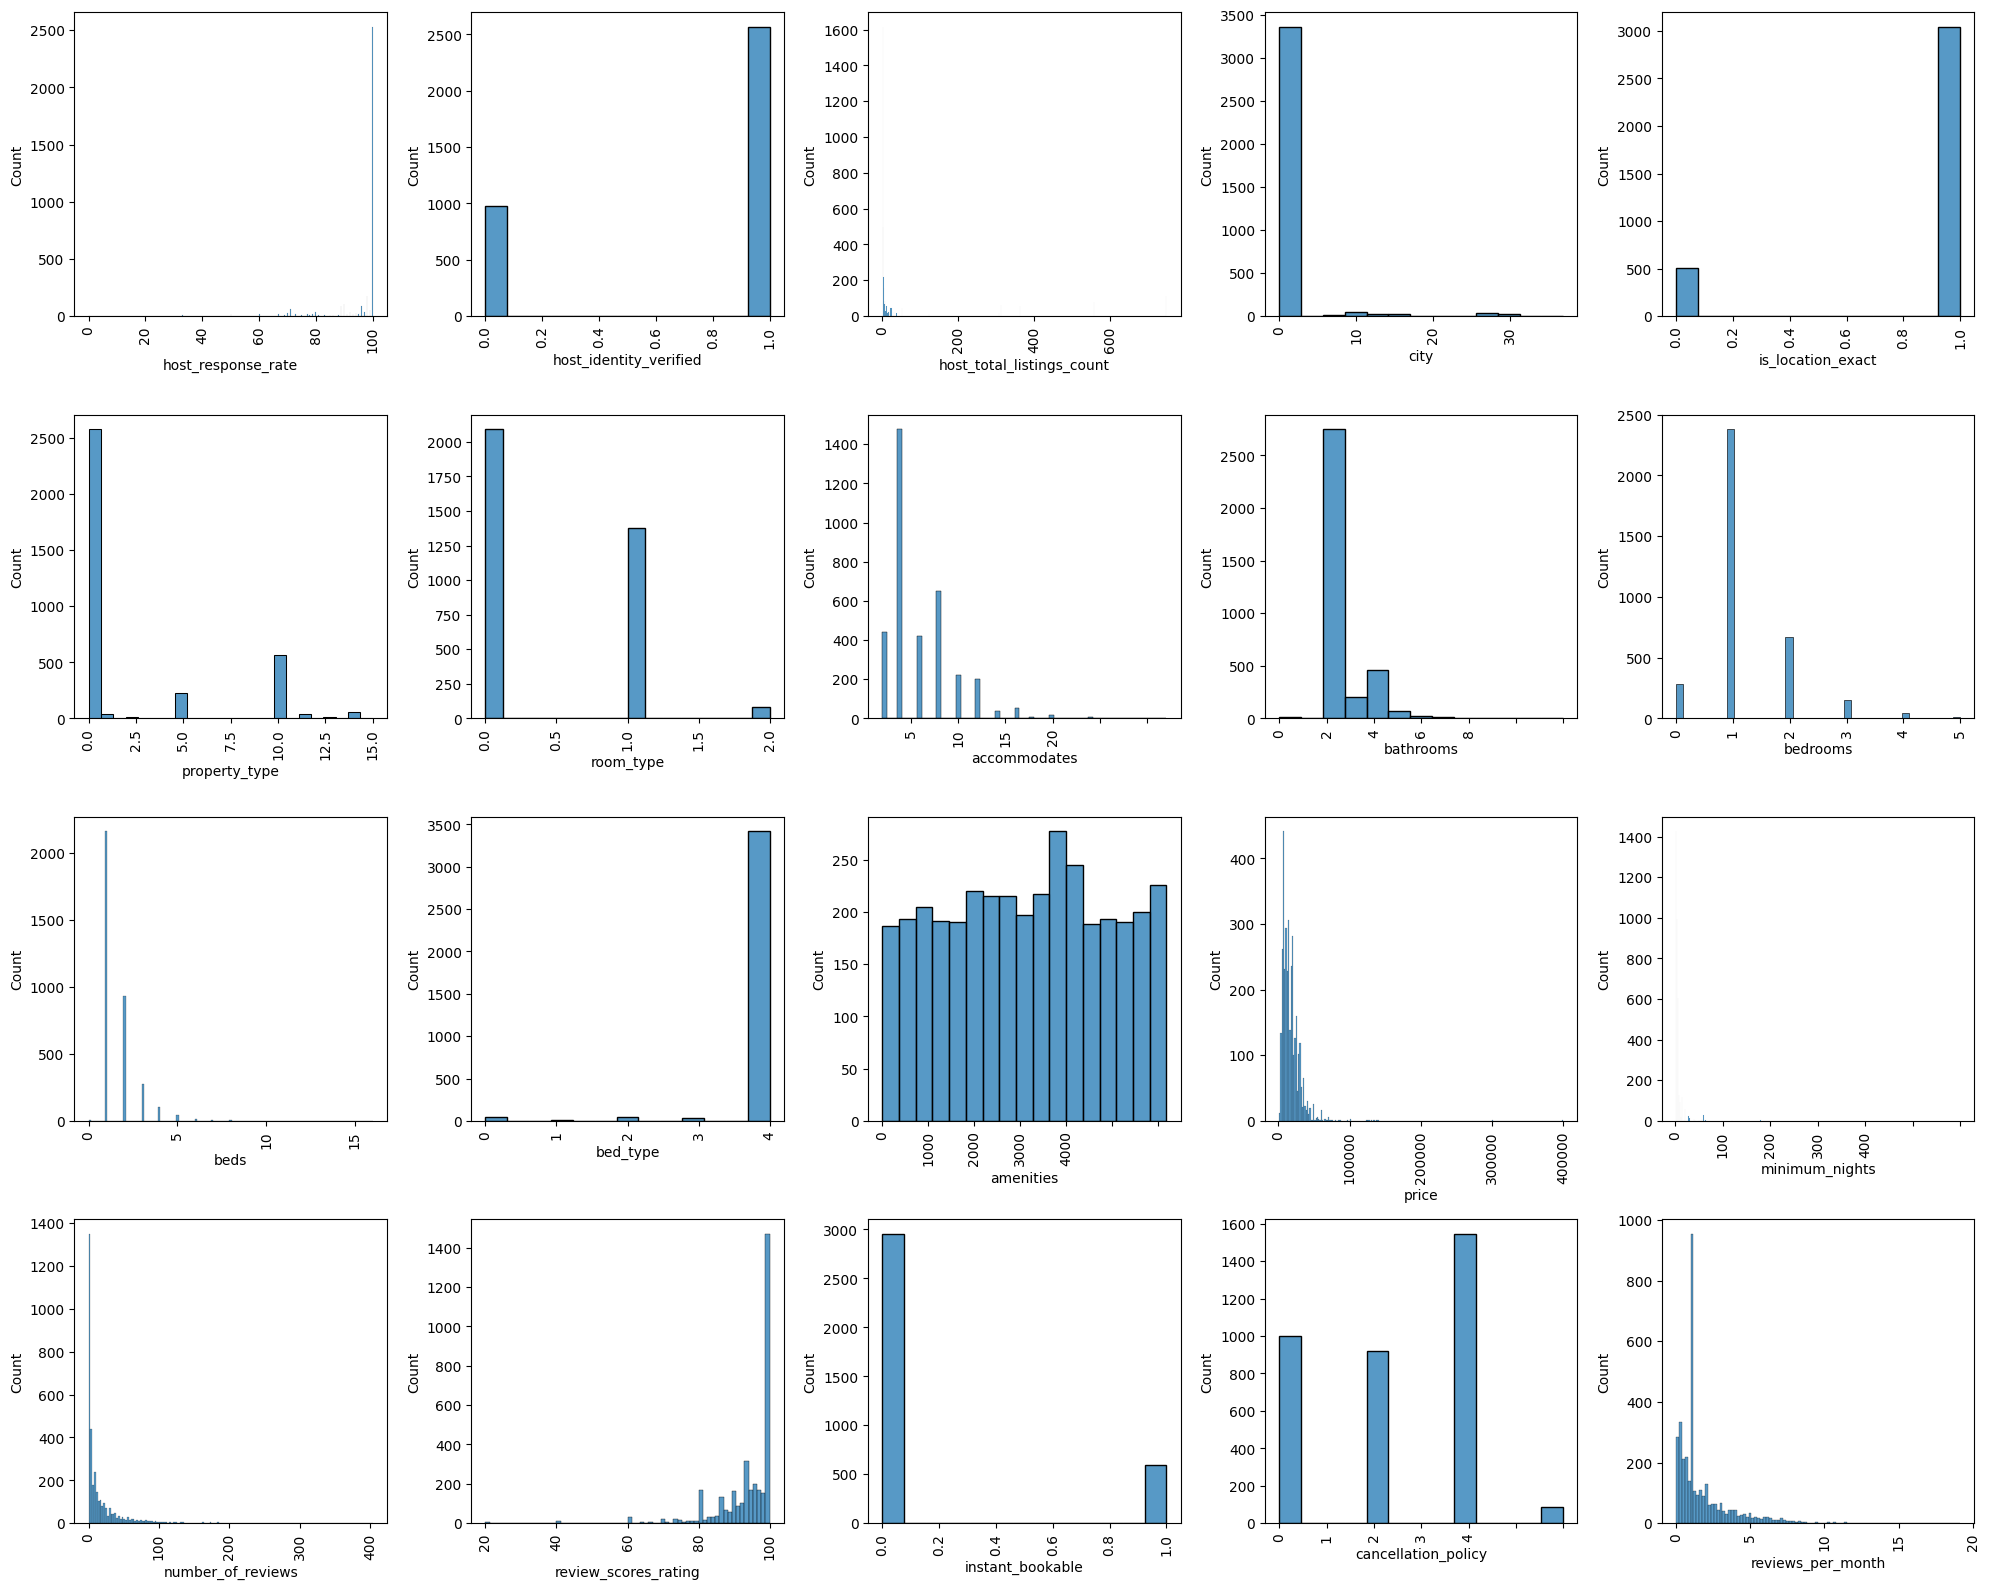

In [86]:
data = df.iloc[:, :-1] # exclude the last column because it is the target

num_cols = data.shape[1]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

axes = axes.flatten()
warnings.filterwarnings('ignore')
# Iterating over each column
for i, col in enumerate(data.columns):
    ax = axes[i]
    sns.histplot(x=data[col], ax=ax)
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    


# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

We use distribution analysis to draw histograms for each feature in the dataset to better visualize the distribution of the data. This helps to understand the spread of data across various functions. These histograms show the distribution of each feature, providing an understanding of the data spread. For instance, many of the listings only need to be occupied for a short period of time, and a large number of these listings only need to be booked for 1-2 days. 

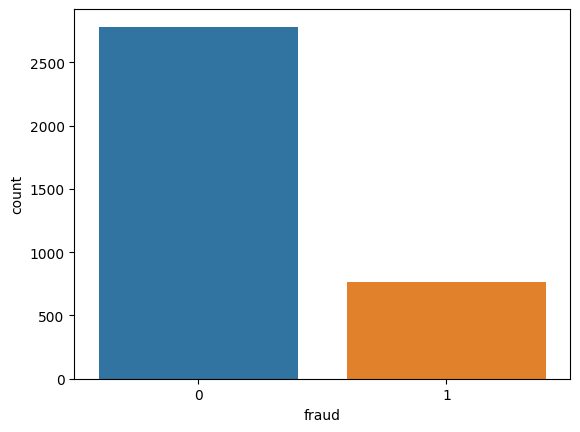

In [87]:
# Display the distribution of 'Died
sns.countplot(x='fraud', data=df)
plt.show()

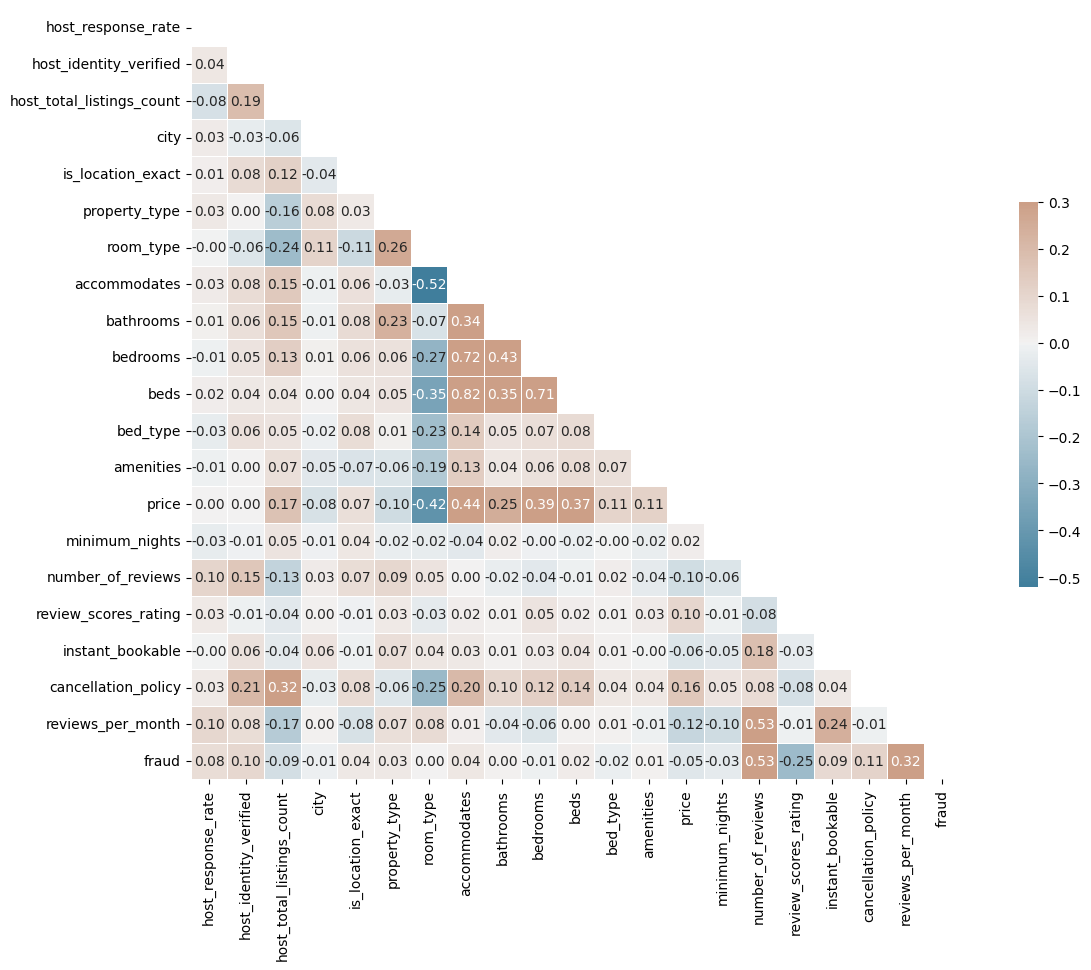

In [88]:
numerical_columns = df.select_dtypes(include=[np.number])  # select all numerical columns
corr = numerical_columns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 30, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio. Round numbers to 2 digits.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,
            fmt=".2f")

plt.show()

There are 3549 observations and 21 variables.



*   Binary Variables: host_identity_verified, is_location_exact, instant_bookable, fraud.
*   Categorical Variables: property_type, room_type, bed_type, cancellation_policy, city.

The correlation matrix is calculated to determine the relationship between the different numerical features.  With 3549 observations and 21 variables, examining the correlation coefficients between the "fraud" variable and the others allows us to identify features with relatively strong relationships to "fraud". Notably, the "number_of_reviews" exhibits a positive correlation coefficient of 0.53, indicating a moderate positive relationship with fraud. This suggests that as the number of reviews increases, the likelihood of fraud tends to rise.

In [89]:
corr_matrix = df.corr()

corr_matrix["fraud"].sort_values(ascending=False)

fraud                        1.000000
number_of_reviews            0.532263
reviews_per_month            0.321267
cancellation_policy          0.108328
host_identity_verified       0.097983
instant_bookable             0.087338
host_response_rate           0.075115
accommodates                 0.039517
is_location_exact            0.035545
property_type                0.034360
beds                         0.021478
amenities                    0.007541
bathrooms                    0.002031
room_type                    0.000777
bedrooms                    -0.008856
city                        -0.014158
bed_type                    -0.020258
minimum_nights              -0.034821
price                       -0.051955
host_total_listings_count   -0.085581
review_scores_rating        -0.245719
Name: fraud, dtype: float64

['host_total_listings_count',
               'bathrooms',
               'bedrooms',
               'beds',
               'price',
               'minimum_nights',
               'number_of_reviews',
               'review_scores_rating',
               'reviews_per_month']

We can see which features have a relatively strong relationship to fraud

In [90]:
def handle_extreme_values(df, column):
    mean = df[column].mean()
    std = df[column].std()
    upper_limit = mean + 3*std
    

    extreme_values = df[column] > upper_limit
    
    df.loc[extreme_values, column] = df[column].median()


for column in [ 'review_scores_rating', 'number_of_reviews', 'reviews_per_month','price','host_response_rate','instant_bookable','host_identity_verified']:
    handle_extreme_values(df, column)

Defining extreme values as values more than 3 standard deviations from the mean is based on a common rule in statistics known as the "three sigma principle" or "rule of thumb". This principle is based on the property of the normal distribution, which states that in a normal distribution, approximately 99.7% of the data points will fall within three standard deviations of the mean. In other words, if a data point's value exceeds three standard deviations from the mean, then that data point is a very rare observation and can be considered an extreme value.

We **replace these extreme values with the median** of the corresponding column. We choose the median instead of the mean because the median is not sensitive to extreme values.

We adjusted features that were clearly associated with scams (e.g. number of reviews) and those that were clearly outliers (e.g. price).

**The main reason for choosing to replace data is that our total data volume is too small, and removing too much data may make affect our analysis**

### Numerical Variables Analysis

In [91]:
df.describe()

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
count,3549.00000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,...,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000
mean,95.61623,0.723584,54.038039,2.828684,0.857706,1.892364,0.433362,3.031558,1.217103,1.253874,...,3.908988,1569.582981,16507.692308,3.139194,14.870386,93.686391,0.167371,1.202029,1.610082,0.216117
std,11.84358,0.447288,162.367256,4.091121,0.349400,3.338853,0.539189,1.781028,0.499428,0.751597,...,0.513516,876.729791,10195.300883,8.902631,22.765943,9.062727,0.373359,0.878810,1.553871,0.411653
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1000.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.010000,0.000000
25%,98.00000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.000000,835.000000,8500.000000,1.000000,1.000000,91.000000,0.000000,0.000000,0.640000,0.000000
50%,100.00000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.000000,1601.000000,15000.000000,2.000000,5.000000,97.000000,0.000000,1.000000,1.000000,0.000000
75%,100.00000,1.000000,7.000000,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,...,4.000000,2288.000000,21900.000000,3.000000,19.000000,100.000000,0.000000,2.000000,2.000000,0.000000
max,100.00000,1.000000,749.000000,37.000000,1.000000,12.000000,2.000000,16.000000,6.000000,5.000000,...,4.000000,3091.000000,60300.000000,300.000000,125.000000,100.000000,1.000000,3.000000,7.550000,1.000000


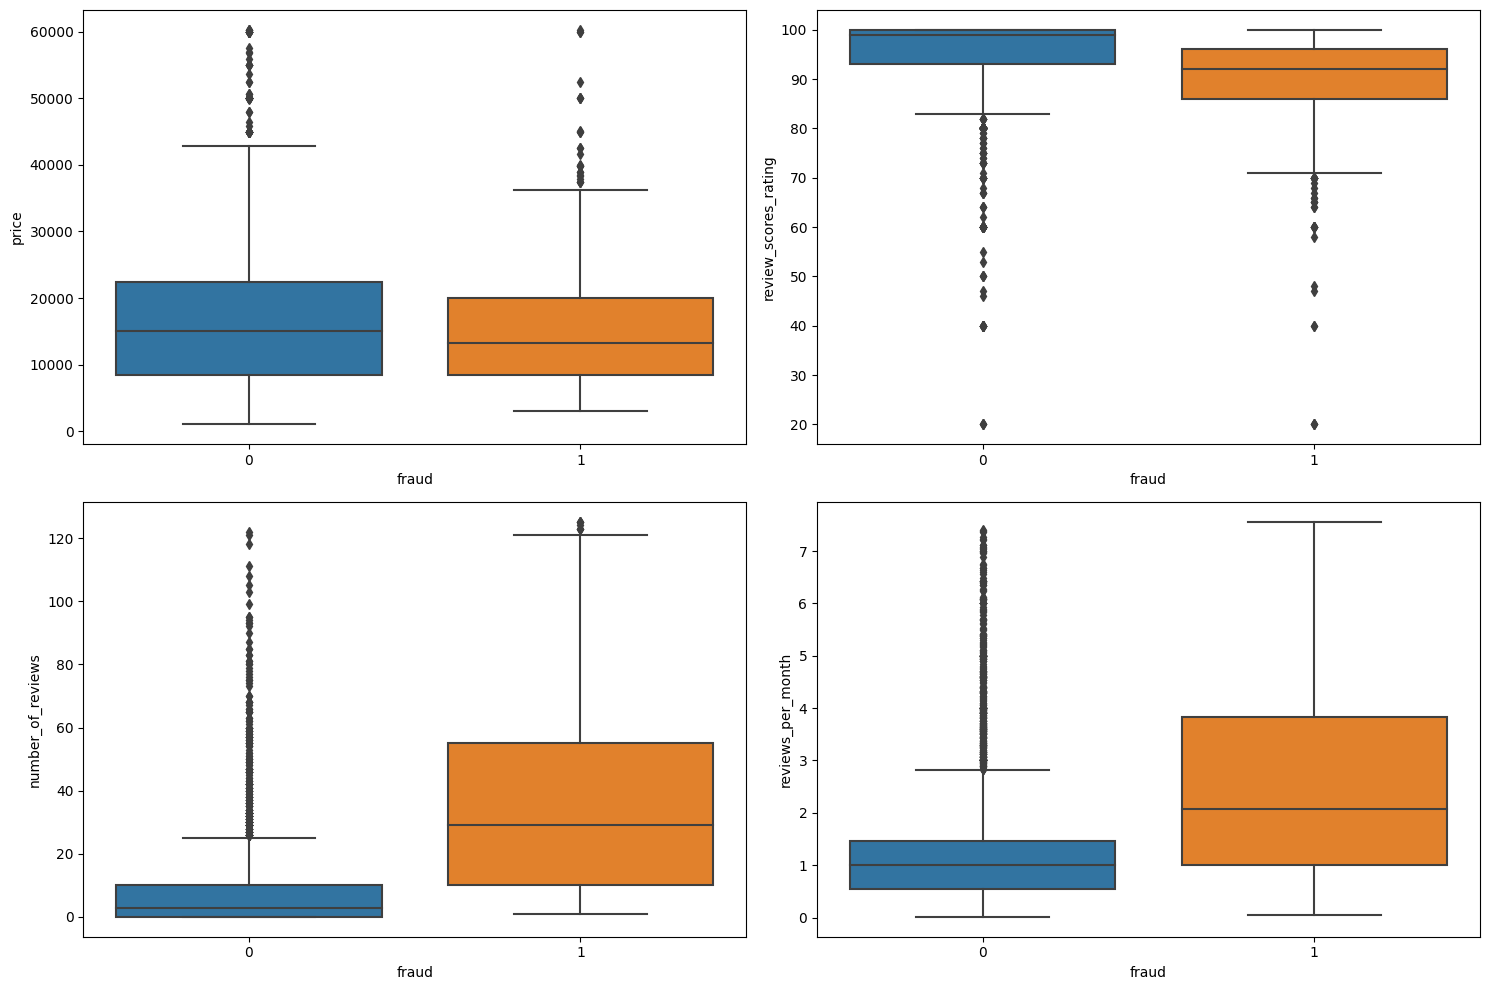

In [92]:
selected_features = ['price', 'review_scores_rating', 'number_of_reviews', 'reviews_per_month']
['host_total_listings_count',
               'bathrooms',
               'bedrooms',
               'beds',
               'price',
               'minimum_nights',
               'number_of_reviews',
               'review_scores_rating',
               'reviews_per_month']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, feature in enumerate(selected_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x='fraud', y=feature, data=df, ax=axs[row, col])

plt.tight_layout()
plt.show()

**Some Key Insights:**

- price: Fraud listings have a slightly lower median price than non-fraud listings and the price range is narrower. This could imply that fraudsters tend to set modest prices to attract customers, rather than opting for very high or very low prices. However, it is noteworthy that "price" is not a significant predictor for fraud detection. 

- review_scores_rating: Median ratings for non-fraud listings are slightly higher than fraudulent listings. This may be because real listings are more likely to get positive feedback.

- number_of_reviews: Fraud listings have a higher median number of reviews than non-fraud ones, possibly because scam listings tend to get more reviews by customers who would convey that the listing is a fraudulent.

- reviews_per_month: Fraud listings again have a higher median number of reviews per month due to the same reason.

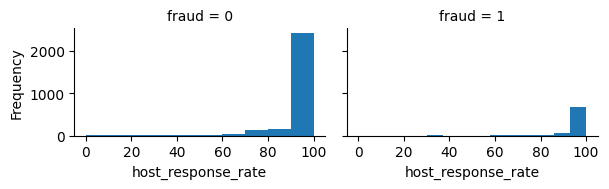

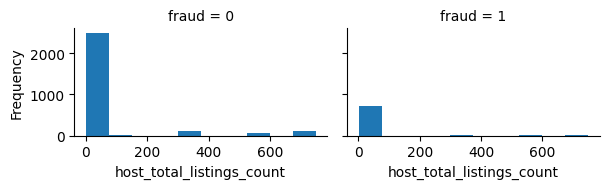

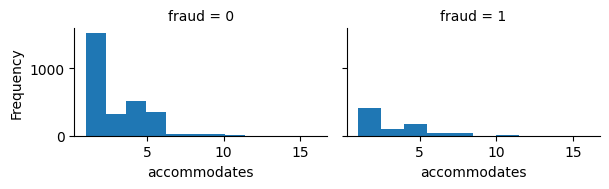

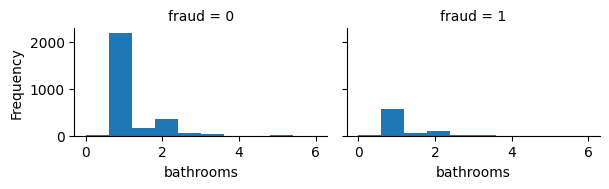

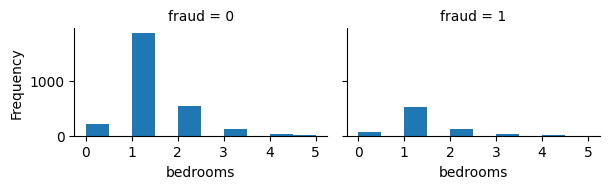

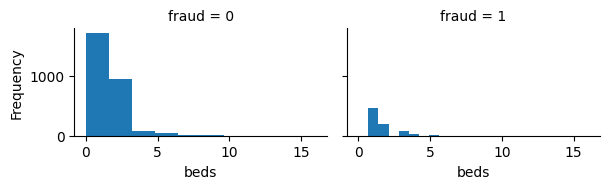

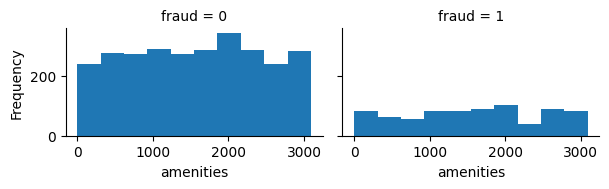

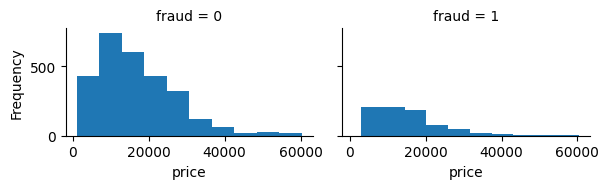

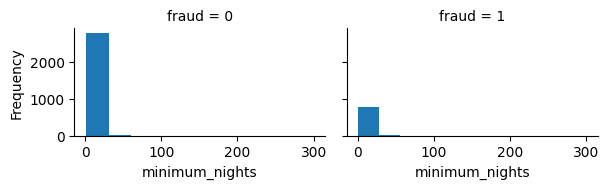

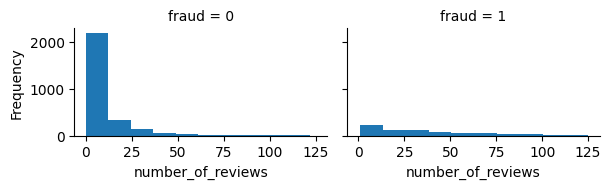

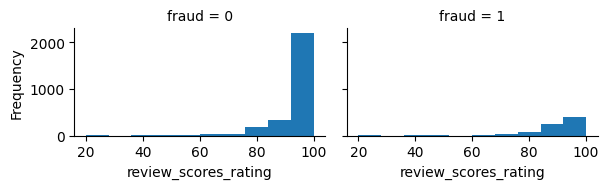

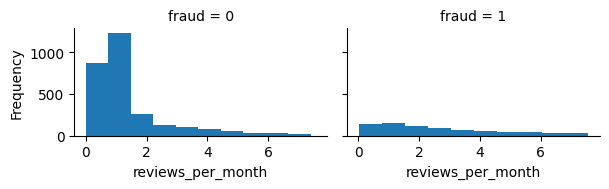

In [93]:
# numerical variables list
num_var = ['host_response_rate', 'host_total_listings_count', 'accommodates',
            'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
            'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
# plot histograms for each numerical variable group by fraud
for var in num_var :
  plot = sns.FacetGrid(df, col='fraud', height=2, aspect = 1.5)
  plot.map(plt.hist, var)
  plot.set_axis_labels(var, 'Frequency')
  plt.show()

The amenities shows a flat distribution, plus it is missing the meaning of numbers from the souce of dataset, it should be excluded.


Overall, # (fraud = 0) > # (fraud = 1)
*   host_response_rate: left-skewed, most of the observations have high response rate (e.g., rate >= 80)  
*   host_total_listings_count: right-skewed, most observations have low count. The range of # listing count for (fraud = 0) group is larger since there are some have count larger than 40 while # listing count in (fraud = 1) group concentrated from 0 to 25.
*   accommodates: right-skewed, (fraud = 1) and (fraud = 0) both have number concentrated around 2 to 4.
*   bathrooms and bedrooms (most have one or two),
*  beds: many observations have 2 beds for both fraud group.
*   amenities: (fraud = 0) has three modes (amentites = 750, 2250, 3000); (fraud = 1) has two modes (amentites = 2000, 2750). The range is relative large.
*  price: right-skewed, most are less than 20000. The range of (fraud = 0) listing is larger.
* minimum_nights, number_of_reviews, reviews_per_month: right-skewed,
reviews_per_month all have left-skewed hitograms.
*   reviews_scores_rating left-skewed.

*Interpretation: center (mean or median), range(e.g., min and max), skewness or shape*


### Categorical variables analysis

**Initial hypothesis** for **categorical variables**: every categorical variable is important

We set an initial hypothesis of every categorical variable is important.  The city variable was excluded from the analysis primarily because City 2 represented the majority of cases, making the distribution variations of other cities negligible for the analysis. Additionally, this dataset focuses on Airbnb cases in Boston. To align with our perspective, we only considered City 2 in the subsequent data training step. Also, this dataset is for Airbnb cases in Boston city. 

In [94]:
df.dtypes

host_response_rate             int64
host_identity_verified         int64
host_total_listings_count      int64
city                           int64
is_location_exact              int64
property_type                  int64
room_type                      int64
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                       int64
amenities                      int64
price                          int64
minimum_nights                 int64
number_of_reviews              int64
review_scores_rating         float64
instant_bookable               int64
cancellation_policy            int64
reviews_per_month            float64
fraud                          int64
dtype: object

In [95]:
df.columns

Index(['host_response_rate', 'host_identity_verified',
       'host_total_listings_count', 'city', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'cancellation_policy', 'reviews_per_month', 'fraud'],
      dtype='object')

<Axes: xlabel='city', ylabel='count'>

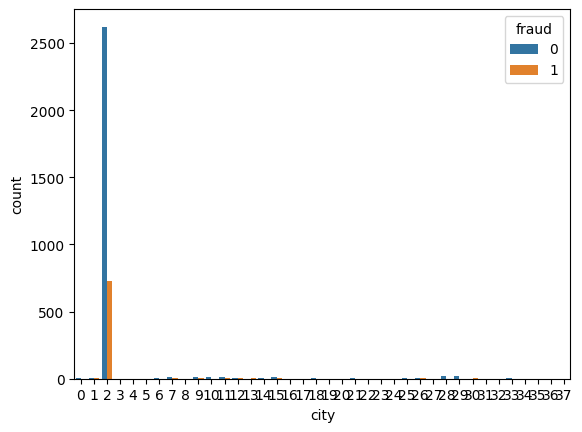

In [96]:
# Reason for why city is excluded

sns.countplot(x='city', hue='fraud', data=df)

Since the distribution of city is mostly in city 2, the distribution variation of the rest cities cannot give a valuable result, so we will **exclude the city** from the categorical analysis.

In [97]:
category_columns = ['host_identity_verified','is_location_exact','room_type','property_type', 'bed_type', 
                     'instant_bookable', 'cancellation_policy']

In the groupby clause, we use this city variable to group and count the total amount of cases. We grouped data by fraud and each categorical variables except for city. For example, we consider the ‘host_identity_verified’ variable as a potentially significant indicator of fraudulent since the distribution of ‘percent_1’ is 10% higher in fraud than non-fraud. Based on this rationale, we selected other categorical variables with distribution variations that are significant to be retained for modelling. After this process, our refined hypothesis for categorical variables was: host_identity_verified, is_location_exact, instant_bookable, property_type and cancellation_policy are the most important categorical variables.

In [98]:
def analyze_percentage(x):
    df_percent = df.groupby(['fraud', x])[['city']].count().unstack() # no reason for "sex", it serves for count()
    df_percent = df_percent.fillna(0)
    df_percent['total'] = 0
    for i in range(0,len(df[x].unique())):
        df_percent['total'] += df_percent['city'][i]
    for i in range(0, len(df[x].unique())):
        df_percent['percent_' + str(i)] = df_percent['city'][i] / df_percent['total']
    display(df_percent)

In [99]:
for i in category_columns:
    analyze_percentage(i)

city       total percent_0 percent_1
host_identity_verified    0     1                          
fraud                                                      
0                       833  1949  2782  0.299425  0.700575
1                       148   619   767  0.192960  0.807040

city       total percent_0 percent_1
is_location_exact    0     1                          
fraud                                                 
0                  414  2368  2782  0.148814  0.851186
1                   91   676   767  0.118644  0.881356

city           total percent_0 percent_1 percent_2
room_type     0     1   2                                    
fraud                                                        
0          1642  1075  65  2782  0.590223  0.386413  0.023364
1           449   303  15   767  0.585398  0.395046  0.019557

city                                                     ...   
property_type       0     1    2    3      4    5    6    7      8     9  ...   
fraud                                                                     ...   
0              2044.0  27.0  8.0  1.0  190.0  2.0  4.0  1.0  411.0  31.0  ...  \
1               535.0  14.0  4.0  0.0   41.0  0.0  0.0  0.0  151.0   8.0  ...   

              percent_3 percent_4 percent_5 percent_6 percent_7 percent_8   
property_type                                                               
fraud                                                                       
0              0.000359  0.068296  0.000719  0.001438  0.000359  0.147735  \
1              0.000000  0.053455  0.000000  0.000000  0.000000  0.196871   

              percent_9 percent_10 percent_11 percent_12  
property_type                                             
fraud                                                     
0              0.011143   0.005392   0.015457   0.001797  
1              0.010430   0.002608   0.014342   0.001304  

[2 rows x 27 columns]

city                  total percent_0 percent_1 percent_2 percent_3   
bed_type    0  1   2   3     4                                                 
fraud                                                                          
0          31  8  33  24  2686  2782  0.011143  0.002876  0.011862  0.008627  \
1           9  2  18   7   731   767  0.011734  0.002608  0.023468  0.009126   

         percent_4  
bed_type            
fraud               
0         0.965492  
1         0.953064

city      total percent_0 percent_1
instant_bookable     0    1                          
fraud                                                
0                 2364  418  2782  0.849748  0.150252
1                  591  176   767  0.770535  0.229465

city                total percent_0 percent_1 percent_2   
cancellation_policy    0    1     2   3                                       
fraud                                                                         
0                    880  668  1165  69  2782  0.316319  0.240115  0.418763  \
1                    119  251   381  16   767  0.155150  0.327249  0.496741   

                    percent_3  
cancellation_policy            
fraud                          
0                    0.024802  
1                    0.020860

Refined hypothesis: host_identity_verified, is_location_exact, instant_bookable, property_type and cancellation_policy are the most importnat categorical variables

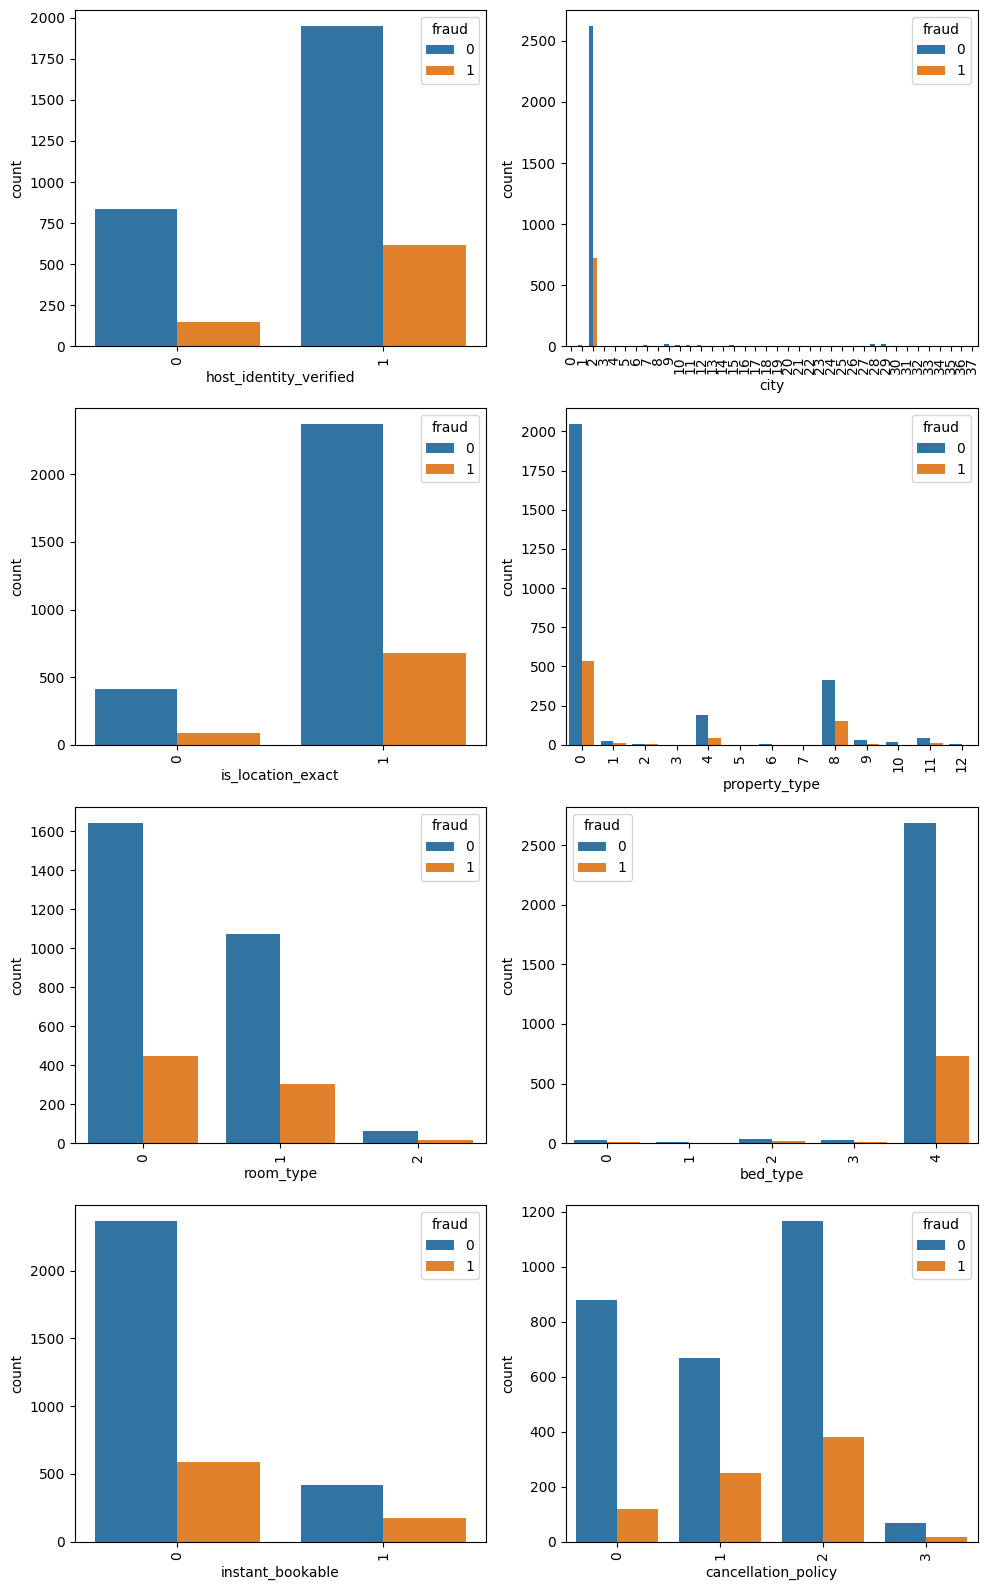

In [100]:
selected_features = ['host_identity_verified', 'city', 'is_location_exact', 'property_type', 
                     'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy']


fig, axs = plt.subplots(4, 2, figsize=(10, 16))

for i, feature in enumerate(selected_features):
    row = i // 2
    col = i % 2
    sns.countplot(x=feature, hue='fraud', data=df, ax=axs[row, col])
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

For the Fraud Distribution Analysis, the grid of countplots has been constructed, each emphasizing unique categorical variables. These plots demonstrate the distribution of categorical variables between fraud and non-fraud instances across individual features. One important observation is the clear imbalance between non-fraudulent and fraudulent cases in the distribution. This significant asymmetry can greatly impact the effectiveness of models that are trained using this data. Therefore, it is crucial to evaluate the models with a well-rounded perspective, considering the distributional imbalance. 

## Modelling with classification models

Till now, we have seen that the distribution of non-fraud and fraud is biased. This could influence the performance of trained models. We cannot solely rely on accuracy score, and we need to value metrics like f1, and roc curve. To improve the accuracy and precision on this dataset, we need to use cross-validation to calculate a more representative accuracy score. Also, we will use an ROC curve to monitor the prediction results when evaluating the model's performance with a rare positive class.
For modelling, we decided to use:
1. Gaussian NB Classifier
2. K-Neighbours Classifier
3. Logistic Regression

We also considered Support Vector Machine but it works the best with well separated data, and this dataset has little separation as analyzed in the categorical and numerical analysis, therefore, SVM will not be used in this study.


In [101]:
df.head()

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
0,90,1,6,1,1,0,1,1,1.0,1.0,...,4,547,4000,7,34,90.0,0,2,0.38,0
1,100,1,7,2,1,8,1,2,1.0,1.0,...,4,1158,14500,3,36,91.0,0,2,0.40,0
2,100,1,7,2,1,0,0,4,1.0,1.0,...,4,2016,19500,3,47,95.0,0,2,0.54,1
3,100,1,1,2,1,0,1,2,1.0,1.0,...,4,964,6500,3,41,98.0,0,1,0.47,0
4,100,0,12,2,1,0,0,3,1.0,1.0,...,4,1794,15400,30,18,91.0,0,1,0.21,0


In [102]:
cat_columns = ['property_type',
               'host_identity_verified',
               'is_location_exact',
               'instant_bookable',
               'cancellation_policy',
               ]
num_columns = ['host_total_listings_count',
               'bathrooms',
               'bedrooms',
               'beds',
               'price',
               'minimum_nights',
               'number_of_reviews',
               'review_scores_rating',
               'reviews_per_month']
target = 'fraud'

In [103]:
# Building the Pre-processor
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [104]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)


In [105]:
preprocessor.fit(df[cat_columns + num_columns])
x_train_transformed = preprocessor.transform(X_train)
x_test_transformed = preprocessor.transform(X_test)

Here, we fit the preprocessor on the combined data of both X_train and X_test first and then transform both sets separately. This ensures that the same transformation is applied to both training and testing data consistently.

In [106]:
print(X_train.shape, X_test.shape)

(2839, 14) (710, 14)


In [107]:
print(x_train_transformed.shape, x_test_transformed.shape)

(2839, 32) (710, 32)


In [108]:
#Retrieving the names of the encoded features (columns) produced by the preporcessor.
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

# Storing the transformed training and testing data in DataFrames with both the numerical and encoded features(column).
X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

#### HypterParamter Tuning
- Naive Bayes: Naive Bayes models generally have fewer hyperparameters to tune, and their performance is often less sensitive to hyperparameter values. GridSearch can be suitable for NB, especially when you have a small hyperparameter space.

- K-Nearest  and Logistic Regression: Both these models have more hyperparameters. RandomizedSearch can be a good choice for these models when you have a larger hyperparameter space, as it allows you to explore a broader range of values more efficiently. Since randomized searching is used, the run-time result may vary for each execution.

In [109]:
# Hyperparameter tuning
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}
params_log = {'penalty':['l2', 'elasticnet'], 'C':[0.01, 0.1, 1.0], 'fit_intercept':[True, False],
                 'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'], 'l1_ratio':[0.00001, 0.001, 0.1, 1.0]}

# Define the models
nb = GaussianNB()
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000)

# Define GridSearchCV
gridsearch_nb = GridSearchCV(nb, params_nb, cv=5, scoring='roc_auc')
# Use randomized search for knn and Logistic Regression because there are too many parameters.
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, scoring='roc_auc')
randomsearch_log = RandomizedSearchCV(log_reg, params_log, cv=10, n_iter=15, scoring='roc_auc')

# Fit models
gridsearch_nb.fit(X_train_transformed, y_train)
randomsearch_knn.fit(X_train_transformed, y_train)
randomsearch_log.fit(X_train_transformed, y_train)

# Get the best parameters
print("Best parameters for Naive Bayes: ", gridsearch_nb.best_params_)
print("Best parameters for KNN: ", randomsearch_knn.best_params_)
print("Best parameters for Logistic Regression: ", randomsearch_log.best_params_)

Best parameters for Naive Bayes:  {'var_smoothing': 1.0}
Best parameters for KNN:  {'weights': 'distance', 'n_neighbors': 74}
Best parameters for Logistic Regression:  {'solver': 'newton-cg', 'penalty': 'l2', 'l1_ratio': 1e-05, 'fit_intercept': False, 'C': 0.1}


#### Cross-Validation
   Cross-validation is a technique used to assess the performance of a model on unseen data. It involves dividing the dataset into multiple subsets (folds), training the model on some folds, and then evaluating its performance on the remaining fold. This process is repeated multiple times, with different folds used for training and testing in each iteration. Cross-validation helps to provide a more robust estimate of a model's performance and generalization ability by reducing the potential bias that can arise from a single train-test split.
   
   **Interpreting Cross-Validation Results:**
   Cross-validation results provide insights into how well a model generalizes to unseen data. In the context of ROC AUC scoring:
   - A higher ROC AUC score indicates better discrimination ability and separation between positive and negative classes. It implies that the model is better at distinguishing between the classes.
   - A ROC AUC score of 0.5 suggests that the model's predictive power is equivalent to random guessing, while a score below 0.5 indicates worse performance than random guessing.

In [110]:
# Apply the best parameters
nb_best = GaussianNB(**gridsearch_nb.best_params_)
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
log_best = LogisticRegression(**randomsearch_log.best_params_)

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
cv_scores_knn = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
cv_scores_log = cross_val_score(log_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)
print("Cross-validation scores for Logistic Regression: ", cv_scores_log)

Cross-validation scores for Naive Bayes:  [0.86461043 0.83887649 0.80301339 0.76930804 0.84206182]
Cross-validation scores for KNN:  [0.85499055 0.87914807 0.84315476 0.80861235 0.85217212]
Cross-validation scores for Logistic Regression:  [0.8679044  0.89164807 0.85120908 0.82699033 0.86507728]


In [115]:
avg_cvs_nb = (0.86461043 + 0.83887649 + 0.80301339 + 0.76930804 + 0.84206182)/5
avg_cvs_knn =(0.85499055 + 0.87914807 + 0.84315476 + 0.80861235 + 0.85217212)/5
avg_cvs_log =(0.8679044  + 0.89166667 + 0.85120908 + 0.82699033 + 0.86507728)/5

print("Average Cross-validation scores for Naive Bayes: ", avg_cvs_nb)
print("Average Cross-validation scores for KNN: ", avg_cvs_knn)
print("Average Cross-validation scores for Logistic Regression: ", avg_cvs_log)

Average Cross-validation scores for Naive Bayes:  0.823574034
Average Cross-validation scores for KNN:  0.84761557
Average Cross-validation scores for Logistic Regression:  0.8605695520000001


- By comparing the cross-validated scores of these three models, we can say that all of very close and perfrom very well. Howvever, Logistic Regression has the best performance whereas Naive Bayes has the worst. However, we will look at different performance metric as well

In [116]:
# Fit the models with the best parameters
nb_best.fit(X_train_transformed, y_train)
knn_best.fit(X_train_transformed, y_train)
log_best.fit(X_train_transformed, y_train)

# Evaluate on the test set
y_pred_nb = nb_best.predict(X_test_transformed)
y_pred_knn = knn_best.predict(X_test_transformed)
y_pred_log = log_best.predict(X_test_transformed)

print("Naive Bayes Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_nb))
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Precision: ", precision_score(y_test, y_pred_nb))
print("Recall: ", recall_score(y_test, y_pred_nb))
print("F1 Score: ", f1_score(y_test, y_pred_nb))

print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))

print("\nLogistic Regression: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_log))
print("Accuracy: ", accuracy_score(y_test, y_pred_log))
print("Precision: ", precision_score(y_test, y_pred_log))
print("Recall: ", recall_score(y_test, y_pred_log))
print("F1 Score: ", f1_score(y_test, y_pred_log))

Naive Bayes Metrics: 
Confusion Matrix:  [[535   6]
 [123  46]]
Accuracy:  0.8183098591549296
Precision:  0.8846153846153846
Recall:  0.27218934911242604
F1 Score:  0.41628959276018096

K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[529  12]
 [114  55]]
Accuracy:  0.8225352112676056
Precision:  0.8208955223880597
Recall:  0.3254437869822485
F1 Score:  0.46610169491525427

Logistic Regression: 
Confusion Matrix:  [[526  15]
 [108  61]]
Accuracy:  0.8267605633802817
Precision:  0.8026315789473685
Recall:  0.3609467455621302
F1 Score:  0.4979591836734694


Based on these performance metrics:
- Logistic Regression has the highest accuracy (82.6%) , recall score(0.36) and f1 score(0.497). This appears to be the best model even though the other 2 are not performing very poorly compared to Logistic Regression.

- Although this model performed reasonably well in terms of overall accuracy, its performance in identifying cases of fraud could still be improved. This may be because our dataset is unbalanced, i.e. the number of fraudulent cases is much less than the number of non-fraudulent cases. We also prefer a higher recall since we want to maximize the TP and minimize FN Airbnb Listings to minimize the number actual fraud that are not detected.

- Compared to the logistic regression model, the KNN model suffered a slight drop in overall accuracy, and also performed less well in identifying cases of fraud. This may be because KNN models generally perform poorly on imbalanced datasets, as it is more likely to classify new instances into classes that are more numerous in the dataset.

#### ROC Cruve

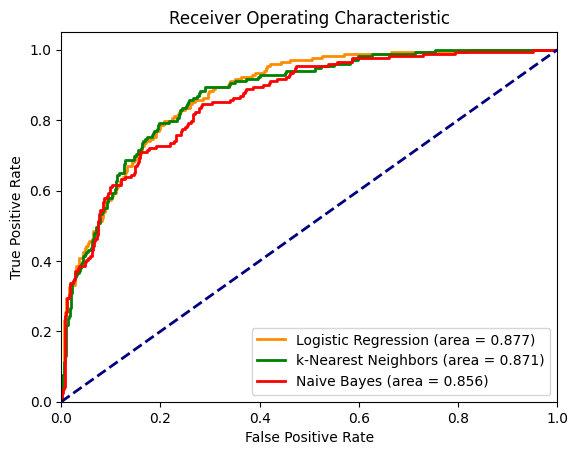

In [113]:
y_prob_log = log_best.predict_proba(X_test_transformed)[:, 1]
y_prob_knn = knn_best.predict_proba(X_test_transformed)[:, 1]
y_prob_nb = nb_best.predict_proba(X_test_transformed)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)


plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='Logistic Regression (area = %0.3f)' % roc_auc_log)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='k-Nearest Neighbors (area = %0.3f)' % roc_auc_knn)
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='Naive Bayes (area = %0.3f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In this graph, the **orange** line represents the logistic regression model, the **green** line represents the KNN model and **red** line represents the Naive Bayes model. The area under the curve (AUC) gives an overall measure of model performance. A perfect model has an AUC close to 1, so the better the model performs, the larger the area under the curve.

As can be seen from the figure, the AUC (0.877) of the logistic regression model is slightly higher than the AUC (0.871) of the KNN model and the AUC (0.856) of NB model, which means that on this dataset, the performance of the logistic regression model is slightly better than that of the KNN model.

#### Metrics Comparison

**Naive Bayes Metrics:**
- Confusion Matrix:  [[535   6][123  46]]
- Accuracy:  0.8183098591549296
- Precision:  0.8846153846153846
- Recall:  0.27218934911242604
- F1 Score:  0.41628959276018096
- Average Cross-validation score:  0.823574034
- AUC ROC Curve - 0.856


**K-Nearest Neighbors Metrics:** 

- Confusion Matrix:  [[529  12][114  55]]
- Accuracy:  0.8225352112676056
- Precision:  0.8208955223880597
- Recall:  0.3254437869822485
- F1 Score:  0.46610169491525427
- Average Cross-validation score:  0.84761557
- AUC ROC Curve - 0.871

**Logistic Regression Metrics:**

- Confusion Matrix:  [[526  15][108  61]]
- Accuracy:  0.8267605633802817
- Precision:  0.8026315789473685
- Recall:  0.3609467455621302
- F1 Score:  0.4979591836734694
- Average Cross-validation score:  0.860569552
- AUC ROC Curve - 0.877


Overall, by comparing the metrics of the three models, logistic model has the highest F1 score. This is important because the target of this dataset is biased, and a higher f1 score means a better balance between precision and recall. Also, since this dataset aims at fraud detection, the recall metric is the most important metric because we want to minimize the FN predictions. This means, we don't want to miss fraudulent transactions, even if we might flag more non-fraudlant transactions as fraud (higher FP). The logistic model possess the highest recall score among the models, so it is the best model for this dataset.

## Recommendation

In [114]:
coefficients = log_best.coef_
classes = log_best.feature_names_in_
dictionary = dict(zip(classes, coefficients[0]))
sorted_dict = dict(sorted(dictionary.items(), key=lambda item: abs(item[1]), reverse=True))

for key, value in sorted_dict.items():
    print(f"{key}:     {value}")

cancellation_policy_1:     0.9357098792991848
property_type_10:     -0.6393476502094861
cancellation_policy_2:     -0.5898564050490634
property_type_4:     -0.5122663949529142
property_type_8:     -0.4464252827338236
property_type_6:     -0.4170821810620161
host_identity_verified_0:     0.35535839978204736
property_type_7:     -0.3539466255388588
cancellation_policy_3:     0.33917727251155944
property_type_9:     -0.32460352386705105
property_type_5:     -0.25876241164796104
property_type_12:     -0.2559815461385807
reviews_per_month:     -0.2504921017276041
property_type_2:     -0.23550497493485725
property_type_11:     -0.23105801003485527
host_total_listings_count:     -0.22662331518226783
price:     -0.158491654389388
bedrooms:     0.1511617938686132
host_identity_verified_1:     -0.1499113521481281
bathrooms:     0.058158751556168314
minimum_nights:     -0.04490026705430062
instant_bookable_1:     0.03669852713644753
instant_bookable_0:     0.03413294469509381
is_location_exact_1:

Based on the result of our modelling, the most effective model is Logistic model and should be used in this fraudulent detection scenario. The most significant coefficients are: 
- host-identity verified
-  cancellation polity
- reviews per month
- is location exact. 

By focusing on these four major variables, AirBnb can improve their ability of distinguishing fraudulent, therefore, procure customer experience and enhance Airbnb's reputation.

#### Conclusion

The Logistic Regression model, characterized by the highest accuracy, recall, and F1 score, outperforms the other two models in fraud detection. Its ease of understanding, interpretability, and low computational expense for training and prediction make it a good choice in this fraudulent detection scenario based on the result of our modelling. The most significant coefficients are host-identity verified, cancellation polity, reviews per month, and is location exact. By focusing on these four major variables, Airbnb can improve their ability of distinguishing fraudulent, therefore, procure customer experience and enhance Airbnb's reputation. 

- Strengthening host identity verification should be a priority. Airbnb could introduce an advanced verification system such as providing multiple forms of government-issued identification, facial recognition selfie clips, and proof of property ownership or rental authorization. These strict measures would make it more challenging for scammers to create fake listings

- Cancellation policies are also an essential aspect to consider. Listings that have extremely flexible cancellation policies may raise concerns about potential fraud. Therefore, Airbnb ought to establish more stringent guidelines for creating cancellation policies and monitor closely any listings that differ drastically from these guidelines.

- Regularly monitoring and analyzing monthly reviews can help identify anomalies. For example, a sudden influx of positive reviews in a short period may indicate fraudulent activity. Airbnb should take stronger measures to verify the authenticity of reviews and track review patterns for each listing. It could also employ natural language processing (NLP) algorithms to detect fake or paid reviews based on the sentiment and patterns of the text.

- Listings with inaccurate location information can be a potential sign of fraud according to the modelling, despite it is the least significant among the four. Nonetheless, Airbnb should require hosts to verify the exact location of their property. If preferred by Airbnb, machine learning algorithms can be employed to automatically detect any significant deviations in the location details provided by hosts.

- In addition to refining these parameters, Airbnb should conduct regular audits of the detection system and incorporate feedback to improve the predictive accuracy of the model. Additionally, Airbnb could consider conducting user education campaigns focusing on host authentication, cancellation policies, monthly reviews, and location accuracy to develop an informed user base capable of spotting suspicious listings.
